In [1]:
path_to_images = 'C:/Users/Rani/Desktop/ai_training_immages' # foldernames are 1 ... 16

In [2]:
import rawpy
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

In [3]:
def load_nef(path):
    return rawpy.imread(path).postprocess()

(3280, 4948, 3)
6.40625 6.442708333333333
41.273600260416664


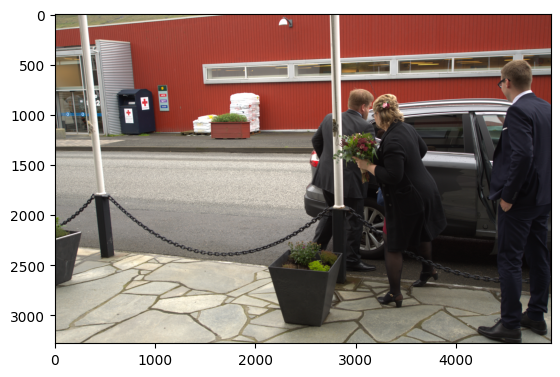

In [4]:

for _, _, pics in os.walk(path_to_images + '/1'):
    for pic in pics:
        npImg = load_nef(path_to_images + '/1/' + pic)
        print(npImg.shape)
        plt.imshow(npImg)
        break
print(3280/512, 4948/768)
print((3280/512)*(4948/768))
    

C:\Users\Rani\AppData\Local\Temp\ipykernel_25332\3932929383.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


6.40625 6.442708333333333
41.273600260416664


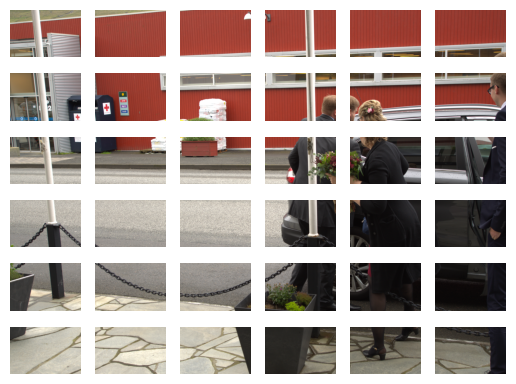

In [5]:
width = 512
hight = 768
npImg = load_nef('C:/Users/Rani/Desktop/ai_training_immages/1/_DSC0001.NEF')

splitImgs = sum([[npImg[i*width:i*width+width, j*hight:j*hight+hight] for i in range(6)] for j in range(6)], start=[])
fig, ax = plt.subplots(6,6)
for i, img in enumerate(splitImgs):
    ax[i%6][i//6].imshow(img)
    ax[i%6][i//6].axis('off')
fig.show()

print(3280/512, 4948/768)
print((3280/512)*(4948/768))

(512, 768, 3)


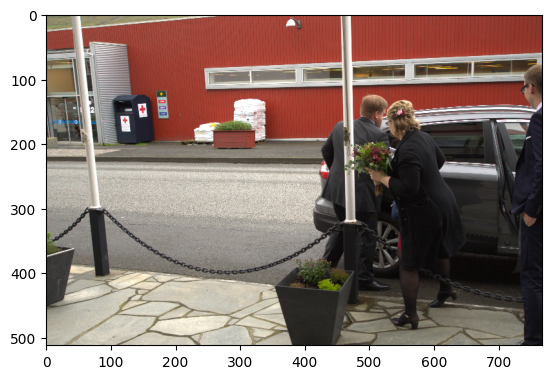

In [6]:
width = 512
hight = 768
npImg = load_nef('C:/Users/Rani/Desktop/ai_training_immages/1/_DSC0001.NEF')

reducedImg = npImg[:512*6,:768*6][::6, ::6]
print(reducedImg.shape)
plt.imshow(reducedImg)



[[[127. 129. 103.]
  [125. 127. 101.]
  [126. 128. 100.]
  [126. 129.  96.]
  [126. 128.  98.]
  [126. 128.  97.]
  [131. 130.  98.]
  [132. 128. 105.]
  [131. 124. 100.]
  [131. 126.  98.]]

 [[126. 131.  95.]
  [125. 127.  97.]
  [123. 125.  96.]
  [124. 126.  95.]
  [128. 128.  96.]
  [126. 129.  97.]
  [129. 129.  95.]
  [132. 131.  99.]
  [135. 132. 102.]
  [136. 132. 104.]]

 [[129. 129.  96.]
  [126. 129.  96.]
  [124. 127.  97.]
  [123. 125.  95.]
  [124. 128.  94.]
  [125. 130. 102.]
  [128. 129.  99.]
  [126. 127.  96.]
  [124. 126.  96.]
  [134. 133. 100.]]

 [[127. 129.  97.]
  [124. 128.  94.]
  [124. 126.  95.]
  [124. 125.  95.]
  [123. 124.  94.]
  [124. 123.  95.]
  [125. 125.  95.]
  [129. 126.  95.]
  [125. 128.  95.]
  [127. 130.  99.]]

 [[130. 130. 101.]
  [132. 132. 105.]
  [130. 132. 104.]
  [131. 132. 101.]
  [131. 132. 103.]
  [129. 129.  97.]
  [133. 129.  96.]
  [130. 130.  97.]
  [128. 129.  96.]
  [128. 129.  95.]]

 [[132. 129. 100.]
  [134. 133. 107.]
  

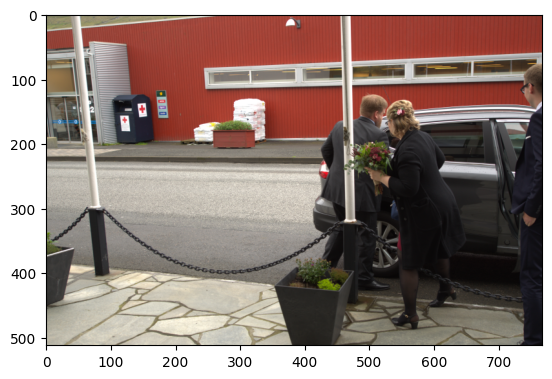

In [7]:
width = 512
hight = 768
npImg = load_nef('C:/Users/Rani/Desktop/ai_training_immages/1/_DSC0001.NEF').astype('float64')
#print(npImg[:10,:10,:])

npImg = npImg[:512*6,:768*6]

reducedImg = np.ones((512, 768, 3))

for i in range(width):
    for j in range(hight):
        reducedImg[i,j,0] = npImg[i*6:i*6+6,j*6:j*6+6,0].sum()/36//1
        reducedImg[i,j,1] = npImg[i*6:i*6+6,j*6:j*6+6,1].sum()/36//1
        reducedImg[i,j,2] = npImg[i*6:i*6+6,j*6:j*6+6,2].sum()/36//1
print(reducedImg[:10,:10,:])
reducedImg = reducedImg.astype('uint8')
print(reducedImg.shape)
plt.imshow(reducedImg)
